# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
sinasc_raw = pd.read_csv("./input/SINASC_RO_2019.csv")
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [5]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
sinasc_raw["faixa_latitude"] = pd.cut(
    sinasc_raw["munResLat"],
    bins=[-float("inf"), -10.5, float("inf")],
    labels=["Abaixo de -10.5", "Acima de -10.5"],
)

In [7]:
resultados = sinasc_raw.groupby("faixa_latitude").agg(
    {
        "IDADEMAE": [
            ("soma", "sum"),
            ("média", "mean"),
            ("mínimo", "min"),
            ("máximo", "max"),
            ("mediana", "median"),
            ("desvio padrão", "std"),
            ("variância", "var"),
        ],
        "QTDFILVIVO":[
            ("soma", "sum"),
            ("média", "mean"),
            ("mínimo", "min"),
            ("máximo", "max"),
            ("mediana", "median"),
            ("desvio padrão", "std"),
            ("variância", "var")]
    },
)
resultados.head()

C:\Users\hfasa\AppData\Local\Temp\ipykernel_22956\215053699.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados = sinasc_raw.groupby("faixa_latitude").agg(


IDADEMAE                                                 \
                    soma      média mínimo máximo mediana desvio padrão   
faixa_latitude                                                            
Abaixo de -10.5   340143  26.178943     12     53    26.0      6.320385   
Acima de -10.5    365094  26.014964     11     52    25.0      6.447663   

                           QTDFILVIVO                                  \
                 variância       soma     média mínimo máximo mediana   
faixa_latitude                                                          
Abaixo de -10.5  39.947272    12600.0  0.980011    0.0   30.0     1.0   
Acima de -10.5   41.572355    14226.0  1.129317    0.0   12.0     1.0   

                                         
                desvio padrão variância  
faixa_latitude                           
Abaixo de -10.5      1.138300  1.295727  
Acima de -10.5       1.198613  1.436674

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [8]:
sinasc_raw["faixa_area"] = pd.cut(
    sinasc_raw["munResArea"],
    bins=[-float("inf"), 3000, float("inf")],
    labels=["Abaixo de 3000", "Acima de 3000"],
)

In [9]:
resultados = sinasc_raw.groupby('faixa_area').agg({'KOTELCHUCK': [
            ("soma", "sum"),
            ("média", "mean"),
            ("mínimo", "min"),
            ("máximo", "max"),
            ("mediana", "median"),
            ("desvio padrão", "std"),
            ("variância", "var")
        ], 'QTDFILMORT':[
            ("soma", "sum"),
            ("média", "mean"),
            ("mínimo", "min"),
            ("máximo", "max"),
            ("mediana", "median"),
            ("desvio padrão", "std"),
            ("variância", "var"),
]})

resultados.head()

C:\Users\hfasa\AppData\Local\Temp\ipykernel_22956\130797693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados = sinasc_raw.groupby('faixa_area').agg({'KOTELCHUCK': [


KOTELCHUCK                                                \
                     soma     média mínimo máximo mediana desvio padrão   
faixa_area                                                                
Abaixo de 3000      24494  4.693236      1      9     5.0      1.456135   
Acima de 3000      109968  5.042553      1      9     5.0      2.182659   

                         QTDFILMORT                                  \
               variância       soma     média mínimo máximo mediana   
faixa_area                                                            
Abaixo de 3000  2.120328     1260.0  0.244803    0.0    4.0     0.0   
Acima de 3000   4.763998     5383.0  0.272116    0.0   28.0     0.0   

                                        
               desvio padrão variância  
faixa_area                              
Abaixo de 3000      0.551215  0.303838  
Acima de 3000       0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [10]:
min_altitude = sinasc_raw['munResAlt'].min()
min_altitude

max_altitude = sinasc_raw['munResAlt'].max()
max_altitude

print(f"Menor valor de munResAlt: {min_altitude}")
print(f"Maior valor de munResAlt: {max_altitude}")

Menor valor de munResAlt: 85.0
Maior valor de munResAlt: 595.0


In [11]:
sinasc_raw["faixa_de_altitude"] = pd.cut(
    sinasc_raw["munResAlt"],
    bins=[-float("inf"), 100, 300, 500, float("inf")],
    labels=["Abaixo de 100", "Entre 100 e 300", "Entre 300 e 500", "Acima de 500"],
)

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [12]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
}
set(imediatas.values())

{'Ariquemes', 'Cacoal', 'Jaru', 'Ji-Paraná', 'Porto Velho', 'Vilhena'}

In [13]:
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)

In [14]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [15]:
sinasc_raw['ano_mes'] = sinasc_raw['DTNASC'].dt.to_period('M')

In [16]:
idade_media = sinasc_raw.groupby(['ano_mes', 'regiao_imediata'])['IDADEMAE'].mean().unstack()
idade_media

regiao_imediata,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
ano_mes,,,,,,
2019-01,24.866412,26.350543,26.086667,25.792056,26.017668,26.665049
2019-02,25.316239,25.969444,25.586777,26.417949,26.215000,26.781818
2019-03,25.288660,26.319410,26.215686,25.490364,26.347207,26.386667
2019-04,25.411972,26.235149,25.291667,26.075862,26.172336,26.686099
2019-05,25.410256,26.031008,25.187050,25.931264,25.830470,25.586207
2019-06,26.652510,25.845333,26.055944,26.272727,26.421628,26.526627
2019-07,24.973783,26.780488,24.611111,25.809399,26.139903,26.373057
2019-08,25.684615,26.539106,25.864865,25.938144,26.070588,26.297436
2019-09,25.561644,26.779126,25.748299,25.640177,25.966435,26.407407


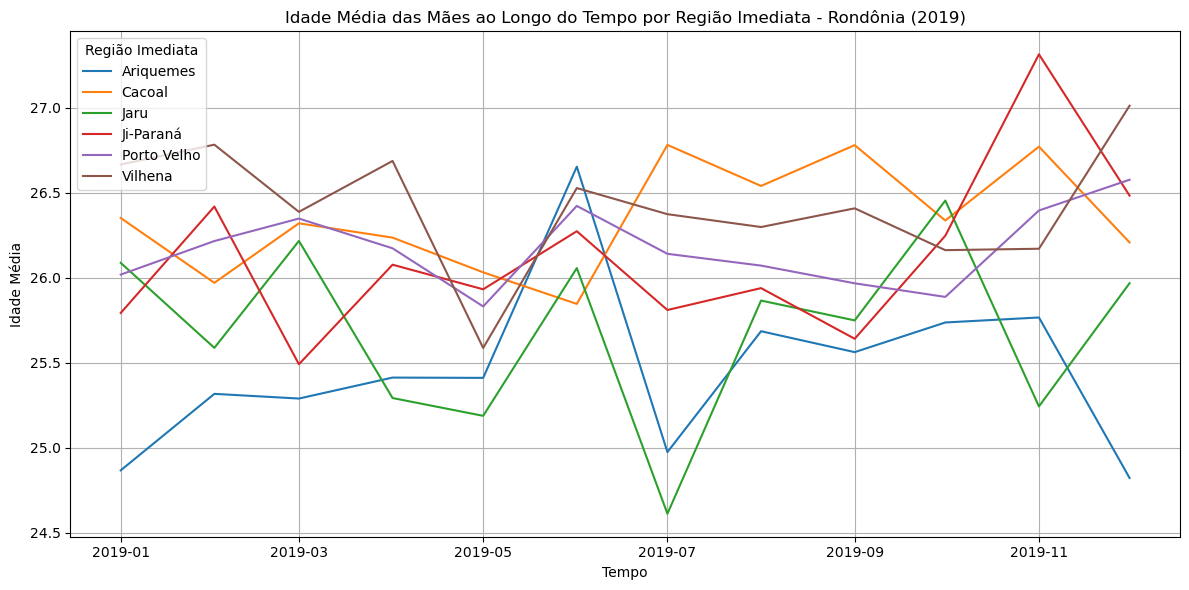

In [17]:
plt.figure(figsize=(12,6))
for regiao in idade_media.columns:
    plt.plot(idade_media.index.to_timestamp(), idade_media[regiao], label=regiao)
    
plt.title('Idade Média das Mães ao Longo do Tempo por Região Imediata - Rondônia (2019)')

plt.xlabel('Tempo')

plt.ylabel('Idade Média')

plt.legend(title='Região Imediata')

plt.grid(True)

plt.tight_layout()

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [18]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M'
tables = pd.read_html(url)

In [19]:
idh_table = tables[0]
idh_table.columns = ['Posição', 'Município', 'IDH', 'IDH_Renda', 'IDH_Longevidade', 'IDH_Educação']
idh_table = idh_table[['Posição', 'Município', 'IDH']].copy()
idh_table

,Posição,Município,IDH
0,nenhum município,nenhum município,nenhum município
1,IDH-M alto,IDH-M alto,IDH-M alto
2,1,Porto Velho,0.736
3,2,Vilhena,0.731
4,3,Cacoal,0.718
5,4,Ji-Paraná,0.714
6,5,Pimenta Bueno,0.710
7,6,Ariquemes,0.702
8,7,Rolim de Moura,0.700
9,IDH-M médio,IDH-M médio,IDH-M médio


In [20]:
idh_table.loc[:,'IDH'] = pd.to_numeric(idh_table['IDH'], errors='coerce')
idh_table.dropna(subset=['IDH'],inplace=True)
idh_table.head(n=5)

,Posição,Município,IDH
2,1,Porto Velho,0.736
3,2,Vilhena,0.731
4,3,Cacoal,0.718
5,4,Ji-Paraná,0.714
6,5,Pimenta Bueno,0.71


In [21]:
def categorize_idh (idh):
    if idh < 0.500:
        return 'Muito Baixo'
    elif idh < 0.600:
        return 'Baixo'
    elif idh < 0.700:
        return 'Médio'
    elif idh < 0.800:
        return 'Alto'
    else:
        return 'Muito Alto'
    

In [22]:
idh_table.loc[:,'faixa_idh'] = idh_table['IDH'].apply(categorize_idh)
idh_table.loc[idh_table['faixa_idh'] == 'Alto']

,Posição,Município,IDH,faixa_idh
2,1,Porto Velho,0.736,Alto
3,2,Vilhena,0.731,Alto
4,3,Cacoal,0.718,Alto
5,4,Ji-Paraná,0.714,Alto
6,5,Pimenta Bueno,0.71,Alto
7,6,Ariquemes,0.702,Alto
8,7,Rolim de Moura,0.7,Alto


In [23]:
idh_table.head(n=5)

,Posição,Município,IDH,faixa_idh
2,1,Porto Velho,0.736,Alto
3,2,Vilhena,0.731,Alto
4,3,Cacoal,0.718,Alto
5,4,Ji-Paraná,0.714,Alto
6,5,Pimenta Bueno,0.71,Alto


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [24]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM'

In [25]:
tables = pd.read_html(url)
ifdm_table = tables[0]
ifdm_table.columns = ['Posição', 'Município', 'IFDM_Consolidado_2013']
ifdm_table.head(n=5)

,Posição,Município,IFDM_Consolidado_2013
0,nenhum município,nenhum município,nenhum município
1,Desenvolvimento moderado,Desenvolvimento moderado,Desenvolvimento moderado
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383


In [26]:
ifdm_table.loc[:,'IFDM_Consolidado_2013'] = pd.to_numeric(ifdm_table['IFDM_Consolidado_2013'], errors='coerce')
ifdm_table.dropna(subset=['IFDM_Consolidado_2013'], inplace=True)
ifdm_table

,Posição,Município,IFDM_Consolidado_2013
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383
5,4º,Porto Velho,0.7257
6,5º,Ji-Paraná,0.7117
7,6º,Cacoal,0.7111
8,7º,Santa Luzia d'Oeste,0.685
9,8º,Rolim de Moura,0.6785
10,9º,Chupinguaia,0.6766
11,10º,São Miguel do Guaporé,0.6699


In [27]:
def categorize_ifdm(ifdm):
        if ifdm < 0.4:
            return 'Baixo'
        elif ifdm < 0.6:
            return 'Regular'
        elif ifdm < 0.8:
            return 'Moderado'
        else:
            return 'Alto'

In [28]:
ifdm_table.loc[:,'faixa_ifdm'] = ifdm_table['IFDM_Consolidado_2013'].apply(categorize_ifdm)
ifdm_table

,Posição,Município,IFDM_Consolidado_2013,faixa_ifdm
2,1º,Ariquemes,0.7746,Moderado
3,2º,Vilhena,0.7465,Moderado
4,3º,Pimenta Bueno,0.7383,Moderado
5,4º,Porto Velho,0.7257,Moderado
6,5º,Ji-Paraná,0.7117,Moderado
7,6º,Cacoal,0.7111,Moderado
8,7º,Santa Luzia d'Oeste,0.685,Moderado
9,8º,Rolim de Moura,0.6785,Moderado
10,9º,Chupinguaia,0.6766,Moderado
11,10º,São Miguel do Guaporé,0.6699,Moderado


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [29]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB'

In [30]:
tables = pd.read_html(url)

In [31]:
acima_de_1_bilhao = tables[0]
acima_de_500_milhoes = tables[1]
acima_de_300_milhoes = tables[2]
acima_de_200_milhoes = tables[3]
acima_de_100_milhoes = tables[4]
ate_100_milhoes = tables[5]


In [32]:
pib_tables = pd.concat([acima_de_1_bilhao, acima_de_500_milhoes, acima_de_300_milhoes, acima_de_200_milhoes, acima_de_100_milhoes, ate_100_milhoes], axis=0)

In [33]:
pib_tables.columns = ['EM_2019','MUDANÇA_2014','MUNICÍPIO','PIB', 'ALTERAÇÃO','EM_2014','MUDANÇA_2011']

In [34]:
pib_tables = pib_tables[['MUNICÍPIO', 'PIB']]
pib_tables.reset_index(inplace=True, drop=True)
pib_tables.head(n=5)

,MUNICÍPIO,PIB
0,Porto Velho,17 912 070
1,Ji-Paraná,3 783 972
2,Vilhena,2 831 175
3,Ariquemes,2 579 830
4,Cacoal,2 261 644


In [35]:
def categorize_pib(pib):
    if pib > 1000000:
        return 'Acima de 1 bilhão'
    elif pib > 500000:
        return 'Acima de 500 milhões'
    elif pib > 300000:
        return 'Acima de 300 milhões'
    elif pib > 200000:
        return 'Acima de 200 milhões'
    elif pib > 100000:
        return 'Acima de 100 milhões'
    else:
        return 'Até 100 milhões'

In [36]:
pib_tables['PIB'] = pib_tables['PIB'].str.replace(' ', '')
pib_tables['PIB'] = pib_tables['PIB'].str.replace(r'[^\d]', '', regex=True) 
pib_tables.head(n=5)

,MUNICÍPIO,PIB
0,Porto Velho,17912070
1,Ji-Paraná,3783972
2,Vilhena,2831175
3,Ariquemes,2579830
4,Cacoal,2261644


In [37]:
pib_tables['PIB'] = pd.to_numeric(pib_tables['PIB'], errors='coerce') # Remove tudo que não for número

In [38]:
pib_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MUNICÍPIO  52 non-null     object
 1   PIB        52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 964.0+ bytes


In [39]:
pib_tables['faixa_pib'] = pib_tables.loc[:,'PIB'].apply(categorize_pib)
pib_tables.head(n=5)

,MUNICÍPIO,PIB,faixa_pib
0,Porto Velho,17912070,Acima de 1 bilhão
1,Ji-Paraná,3783972,Acima de 1 bilhão
2,Vilhena,2831175,Acima de 1 bilhão
3,Ariquemes,2579830,Acima de 1 bilhão
4,Cacoal,2261644,Acima de 1 bilhão


In [40]:
pib_tables.loc[pib_tables['faixa_pib'] == 'Acima de 500 milhões']

,MUNICÍPIO,PIB,faixa_pib
8,Guajará-Mirim,893000,Acima de 500 milhões
9,Ouro Preto do Oeste,834000,Acima de 500 milhões
10,Buritis,726000,Acima de 500 milhões
11,Machadinho do Oeste,633000,Acima de 500 milhões
12,Espigão d'Oeste,625000,Acima de 500 milhões
13,São Miguel do Guaporé,616000,Acima de 500 milhões
14,Candeias do Jamari,548000,Acima de 500 milhões
15,Nova Mamoré,529000,Acima de 500 milhões
16,Cerejeiras,507000,Acima de 500 milhões


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

### INSIGHTS 

- **Concentração de nascimentos:** A maioria dos nascimentos acontece em municípios com PIB acima de 1 bilhão. Isso pode refletir uma concentração maior de pessoas ou melhores condições de saúde nessas regiões.

- **Escolaridade e IDH:** A escolaridade faz toda a diferença para o IDH de um município. Mulheres com níveis mais altos de estudo geralmente vivem em locais com índices de desenvolvimento humano melhores.

- **Peso ao nascer e PIB:** O peso dos bebês só parece estar relacionado ao PIB nos municípios com PIB abaixo de 100 milhões. Nesses casos, os gráficos mostram uma queda significativa. Embora a diferença média de 50g pareça pequena, a curva deixa claro que existe uma redução mais acentuada nesses lugares e demonstra uma tendência de queda.

- **Locais de nascimento:** Independente do IDH, os nascimentos praticamente só acontecem em hospitais. Em municípios menos desenvolvidos, como no estado de Roraima, os dados de 2019 mostram que não há partos em casa ou em outros tipos de estabelecimentos de saúde.

- **Registro de pais:** O registro de pais no nascimento dos filhos é bem parecido em todas as categorias de IDH. Não importa se o município tem IDH alto, médio ou baixo, o comportamento é praticamente o mesmo. 

In [41]:
sinasc_raw.head(n=5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,faixa_latitude,faixa_area,faixa_de_altitude,regiao_imediata,ano_mes
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9.0,10.0,Branca,3685,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,17,NaN,811.0,110001.0,11.0,3.0,NaN,20121999.0,1.0,0.0,0.0,0.0,26.0,15052018.0,39.0,8.0,8.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,19022019.0,12.0,0,1,1,1,0,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Entre 300 e 500,Cacoal,2019-02
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8.0,9.0,Branca,3055,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,15,NaN,811.0,110015.0,11.0,3.0,NaN,27041989.0,1.0,1.0,0.0,1.0,24.0,27052018.0,38.0,8.0,10.0,2.0,1.0,2.0,2.0,1.0,5.0,4.0,21022019.0,12.0,0,1,1,5,1,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Entre 300 e 500,Cacoal,2019-02
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8.0,10.0,Branca,3460,2.0,2019-03-08,NaN,20190004,3.2.01,2019-03-08,11,NaN,841.0,410045.0,41.0,3.0,NaN,6031981.0,1.0,2.0,1.0,1.0,32.0,18052018.0,40.0,8.0,8.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,25022019.0,12.0,0,1,1,7,1,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Entre 300 e 500,Cacoal,2019-02
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000,Entre 300 e 500,Cacoal,2019-03
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,110001,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8.0,10.0,Parda,3310,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,17,NaN,811.0,110001.0,11.0,3.0,NaN,12111988.0,4.0,1.0,0.0,1.0,27.0,27062018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,23032019.0,12.0,0,1,1,5,1,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo de -10.5,Acima de 3000,Entre 300 e 500,Cacoal,2019-03


In [42]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ORIGEM             27028 non-null  int64         
 1   CODESTAB           26913 non-null  float64       
 2   CODMUNNASC         27028 non-null  int64         
 3   LOCNASC            27028 non-null  int64         
 4   IDADEMAE           27028 non-null  int64         
 5   ESTCIVMAE          26711 non-null  float64       
 6   ESCMAE             26716 non-null  object        
 7   CODOCUPMAE         24121 non-null  float64       
 8   QTDFILVIVO         25455 non-null  float64       
 9   QTDFILMORT         24930 non-null  float64       
 10  CODMUNRES          27028 non-null  int64         
 11  GESTACAO           25796 non-null  object        
 12  GRAVIDEZ           26949 non-null  object        
 13  PARTO              26979 non-null  object        
 14  CONSUL

In [43]:
sinasc_1 = pd.merge(sinasc_raw, idh_table, left_on='munResNome', right_on='Município')
sinasc_1 = pd.merge(sinasc_1, ifdm_table, left_on='munResNome', right_on='Município')
sinasc_1 = pd.merge(sinasc_1, pib_tables, left_on='munResNome', right_on='MUNICÍPIO')

sinasc_1

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,faixa_latitude,faixa_area,faixa_de_altitude,regiao_imediata,ano_mes,Posição_x,Município_x,IDH,faixa_idh,Posição_y,Município_y,IFDM_Consolidado_2013,faixa_ifdm,MUNICÍPIO,PIB,faixa_pib
0,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000,Entre 300 e 500,Cacoal,2019-03,48,Alto Alegre dos Parecis,0.592,Baixo,51º,Alto Alegre dos Parecis,0.5046,Regular,Alto Alegre dos Parecis,213410,Acima de 200 milhões
1,1,2516500.0,110001,1,37,1.0,8 a 11 anos,999992.0,1.0,0.0,110050,37 a 41 semanas,Única,Cesáreo,4,2019-04-01,750.0,Feminino,9.0,10.0,Branca,3158,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,8,NaN,811.0,110009.0,11.0,3.0,NaN,7091981.0,1.0,1.0,0.0,1.0,42.0,4072018.0,38.0,8.0,8.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,1042019.0,12.0,0,1,1,5,1,5,7,ATIVO,MUNIC,Novo Horizonte do Oeste,Rondônia,-11.70974,-61.99439,230.0,843.446,Abaixo de -10.5,Abaixo de 3000,Entre 100 e 300,Cacoal,2019-04,32,Novo Horizonte do Oeste,0.634,Médio,32º,Novo Horizonte do Oeste,0.5858,Regular,Novo Horizonte do Oeste,129399,Acima de 100 milhões
2,1,2516500.0,110001,1,31,2.0,12 anos ou mais,NaN,0.0,0.0,110028,37 a 41 semanas,Única,Cesáreo,4,2019-04-05,1450.0,Feminino,9.0,10.0,Branca,3608,2.0,2019-05-08,NaN,20190006,3.2.01,2019-05-09,34,NaN,811.0,110001.0,11.0,5.0,NaN,16051987.0,1.0,0.0,0.0,0.0,37.0,11072018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,5042019.0,8.0,0,1,1,2,0,5,22,ATIVO,MUNIC,Rolim de Moura,Rondônia,-11.72226,-61.78578,227.0,1457.888,Abaixo de -10.5,Abaixo de 3000,Entre 100 e 300,Cacoal,2019-04,7,Rolim de Moura,0.7,Alto,8º,Rolim de Moura,0.6785,Moderado,Rolim de Moura,1283434,Acima de 1 bilhão
3,1,2516500.0,110001,1,26,2.0,8 a 11 anos,999992.0,2.0,0.0,110037,37 a 41 semanas,Dupla,Cesáreo,4,2019-04-08,1050.0,Masculino,9.0,10.0,Parda,2480,2.0,2019-05-08,NaN,20190006,3.2.01,2019-05-09,31,NaN,811.0,110004.0,11.0,3.0,NaN,28071992.0,4.0,2.0,0.0,2.0,43.0,14072018.0,38.0,8.0,11.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,8042019.0,12.0,0,1,1,8,1,5,24,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000,Entre 300 e 500,Cacoal,2019-04,48,Alto Alegre dos Parecis,0.592,Baixo,51º,Alto Alegre dos Parecis,0.5046,Regular,Alto Alegre dos Parecis,213410,Acima de 200 milhões
4,1,2516500.0,110001,1,26,2.0,8 a 11 anos,999992.0,2.0,0.0,110037,37 a 41 semanas,Dupla,Cesáreo,4,2019-04-08,1053.0,Masculino,9.0,10.0,Parda,2728,2.0,2019-05-08,NaN,20190006,3.2.01,2019-05-09,31,NaN,811.0,110004.0,11.0,3.0,NaN,28071992.0,4.0,2.0,0.0,2.0,43.0,14072018.0,38.0,8.0,11.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,8042019.0,12.0,0,1,1,8,1,5,25,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000,Entre 300 e 500,Cacoal,2019-04,48,Alto Alegre dos Parecis,0.592,Baixo,51º,Alto Alegre dos Parecis,0.5046,Regular,Alto Alegre dos Parecis,213410,Acima de 200 milhões
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [44]:
sinasc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25091 entries, 0 to 25090
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ORIGEM                 25091 non-null  int64         
 1   CODESTAB               24981 non-null  float64       
 2   CODMUNNASC             25091 non-null  int64         
 3   LOCNASC                25091 non-null  int64         
 4   IDADEMAE               25091 non-null  int64         
 5   ESTCIVMAE              24802 non-null  float64       
 6   ESCMAE                 24798 non-null  object        
 7   CODOCUPMAE             22490 non-null  float64       
 8   QTDFILVIVO             23544 non-null  float64       
 9   QTDFILMORT             23034 non-null  float64       
 10  CODMUNRES              25091 non-null  int64         
 11  GESTACAO               23924 non-null  object        
 12  GRAVIDEZ               25015 non-null  object        
 13  P

In [45]:
sinasc_1 = sinasc_1[['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'faixa_latitude', 'faixa_area', 'faixa_de_altitude', 'regiao_imediata',
       'ano_mes', 'IDH', 'faixa_idh',
       'IFDM_Consolidado_2013', 'faixa_ifdm',
       'PIB', 'faixa_pib']]
sinasc_1.head(n=5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,faixa_latitude,faixa_area,faixa_de_altitude,regiao_imediata,ano_mes,IDH,faixa_idh,IFDM_Consolidado_2013,faixa_ifdm,PIB,faixa_pib
0,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,110037,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9.0,10.0,Parda,2982,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,20,NaN,841.0,410480.0,41.0,5.0,NaN,15071988.0,4.0,0.0,0.0,0.0,24.0,25062018.0,38.0,8.0,6.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,20032019.0,8.0,0,1,1,2,0,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000,Entre 300 e 500,Cacoal,2019-03,0.592,Baixo,0.5046,Regular,213410,Acima de 200 milhões
1,1,2516500.0,110001,1,37,1.0,8 a 11 anos,999992.0,1.0,0.0,110050,37 a 41 semanas,Única,Cesáreo,4,2019-04-01,750.0,Feminino,9.0,10.0,Branca,3158,2.0,2019-04-03,NaN,20190005,3.2.01,2019-04-09,8,NaN,811.0,110009.0,11.0,3.0,NaN,7091981.0,1.0,1.0,0.0,1.0,42.0,4072018.0,38.0,8.0,8.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,1042019.0,12.0,0,1,1,5,1,5,7,ATIVO,MUNIC,Novo Horizonte do Oeste,Rondônia,-11.70974,-61.99439,230.0,843.446,Abaixo de -10.5,Abaixo de 3000,Entre 100 e 300,Cacoal,2019-04,0.634,Médio,0.5858,Regular,129399,Acima de 100 milhões
2,1,2516500.0,110001,1,31,2.0,12 anos ou mais,NaN,0.0,0.0,110028,37 a 41 semanas,Única,Cesáreo,4,2019-04-05,1450.0,Feminino,9.0,10.0,Branca,3608,2.0,2019-05-08,NaN,20190006,3.2.01,2019-05-09,34,NaN,811.0,110001.0,11.0,5.0,NaN,16051987.0,1.0,0.0,0.0,0.0,37.0,11072018.0,38.0,8.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,5042019.0,8.0,0,1,1,2,0,5,22,ATIVO,MUNIC,Rolim de Moura,Rondônia,-11.72226,-61.78578,227.0,1457.888,Abaixo de -10.5,Abaixo de 3000,Entre 100 e 300,Cacoal,2019-04,0.7,Alto,0.6785,Moderado,1283434,Acima de 1 bilhão
3,1,2516500.0,110001,1,26,2.0,8 a 11 anos,999992.0,2.0,0.0,110037,37 a 41 semanas,Dupla,Cesáreo,4,2019-04-08,1050.0,Masculino,9.0,10.0,Parda,2480,2.0,2019-05-08,NaN,20190006,3.2.01,2019-05-09,31,NaN,811.0,110004.0,11.0,3.0,NaN,28071992.0,4.0,2.0,0.0,2.0,43.0,14072018.0,38.0,8.0,11.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,8042019.0,12.0,0,1,1,8,1,5,24,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000,Entre 300 e 500,Cacoal,2019-04,0.592,Baixo,0.5046,Regular,213410,Acima de 200 milhões
4,1,2516500.0,110001,1,26,2.0,8 a 11 anos,999992.0,2.0,0.0,110037,37 a 41 semanas,Dupla,Cesáreo,4,2019-04-08,1053.0,Masculino,9.0,10.0,Parda,2728,2.0,2019-05-08,NaN,20190006,3.2.01,2019-05-09,31,NaN,811.0,110004.0,11.0,3.0,NaN,28071992.0,4.0,2.0,0.0,2.0,43.0,14072018.0,38.0,8.0,11.0,2.0,1.0,2.0,1.0,1.0,2.0,5.0,8042019.0,12.0,0,1,1,8,1,5,25,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo de -10.5,Acima de 3000,Entre 300 e 500,Cacoal,2019-04,0.592,Baixo,0.5046,Regular,213410,Acima de 200 milhões


<Axes: xlabel='faixa_pib'>

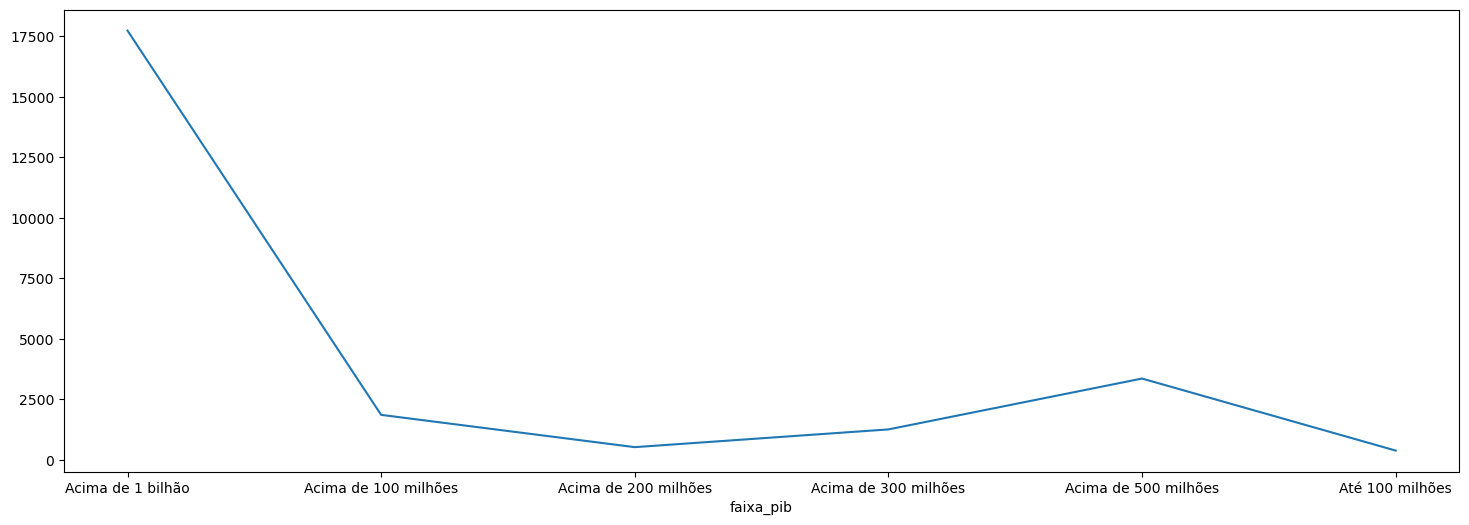

In [46]:
sinasc_1.groupby('faixa_pib')['IDADEMAE'].count().plot(figsize=[18,6])

In [47]:
results = sinasc_1.groupby('faixa_pib')['PESO'].mean()
results

faixa_pib
Acima de 1 bilhão       3247.215719
Acima de 100 milhões    3250.392337
Acima de 200 milhões    3233.701349
Acima de 300 milhões    3240.387380
Acima de 500 milhões    3243.336315
Até 100 milhões         3197.679045
Name: PESO, dtype: float64

<Axes: xlabel='faixa_pib'>

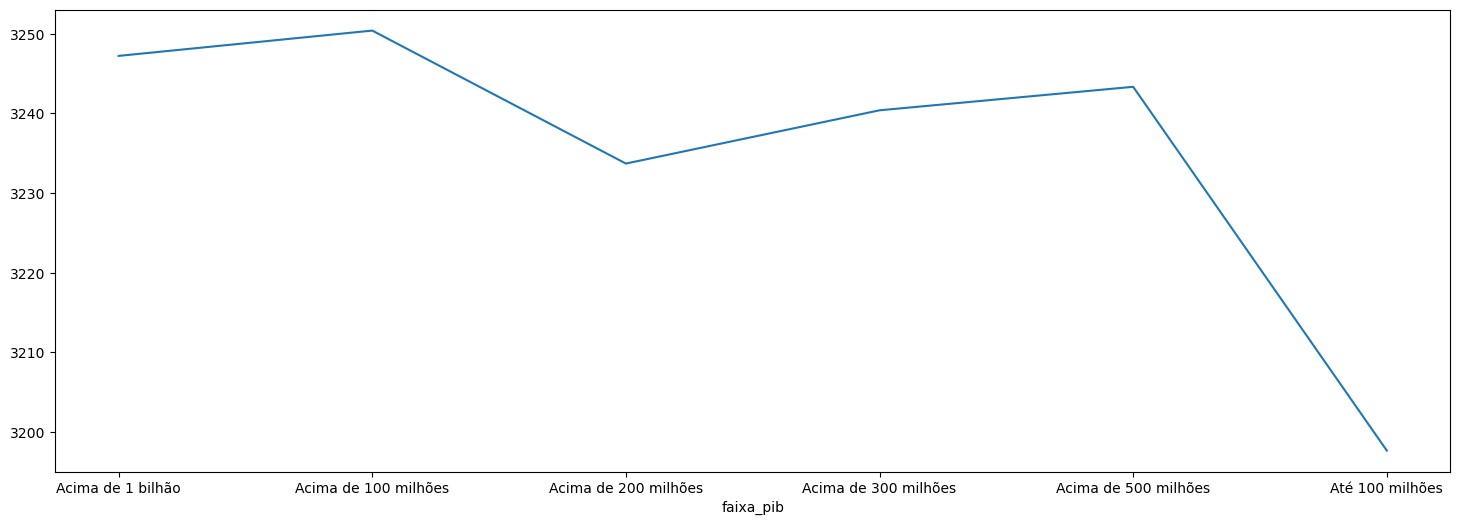

In [48]:
results.plot(figsize=[18,6])

<Axes: xlabel='faixa_idh'>

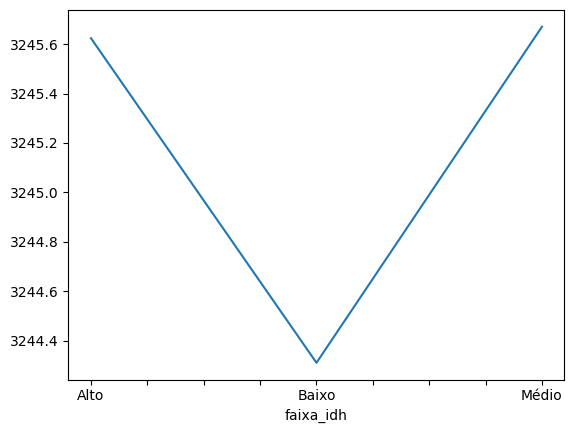

In [49]:
results = sinasc_1.groupby('faixa_idh')['PESO'].mean()
results.plot()

<Axes: xlabel='ESCMAE'>

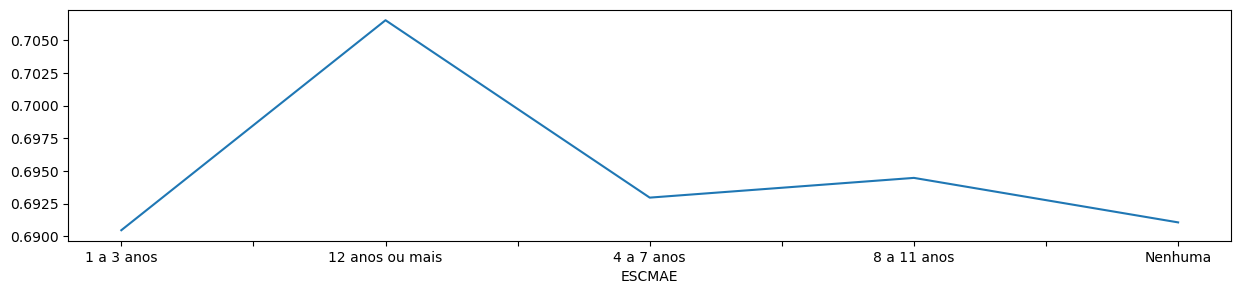

In [50]:
results = sinasc_1.groupby('ESCMAE')['IDH'].mean()
results.plot(figsize=[15,3])

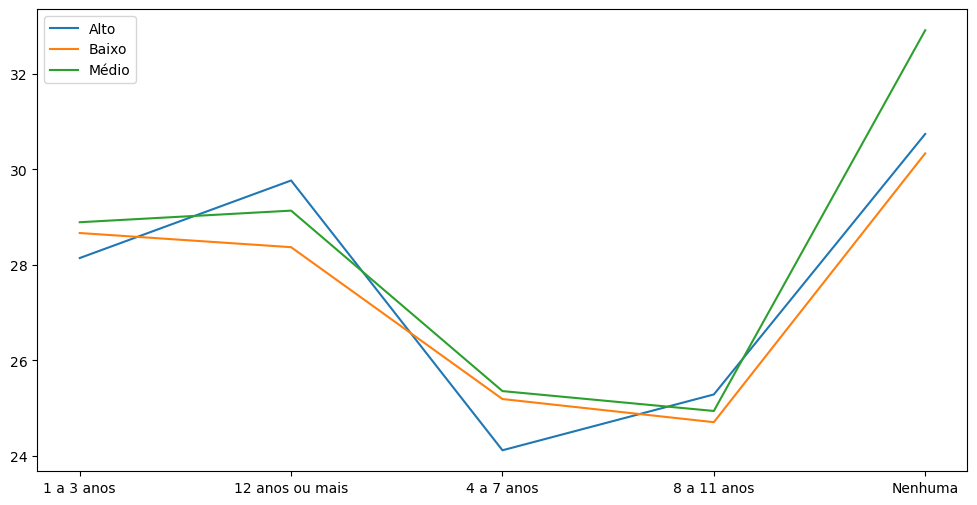

In [51]:
results = sinasc_1.groupby(['ESCMAE', 'faixa_idh'])['IDADEMAE'].mean().unstack()

plt.figure(figsize=[12,6])
for idh in results.columns:
    plt.plot(results.index, results[idh], label=idh)
    plt.legend()

plt.show()
    

In [52]:
results = sinasc_1.groupby(['LOCNASC', 'faixa_idh'])['IDADEMAE'].count().unstack()
results

faixa_idh,Alto,Baixo,Médio
LOCNASC,,,
1,16786,1311,6852
2,13,4,15
3,37,5,29
4,19,6,14


In [53]:
sinasc_1['LOCNASC'].unique()

array([1, 2, 3, 4], dtype=int64)

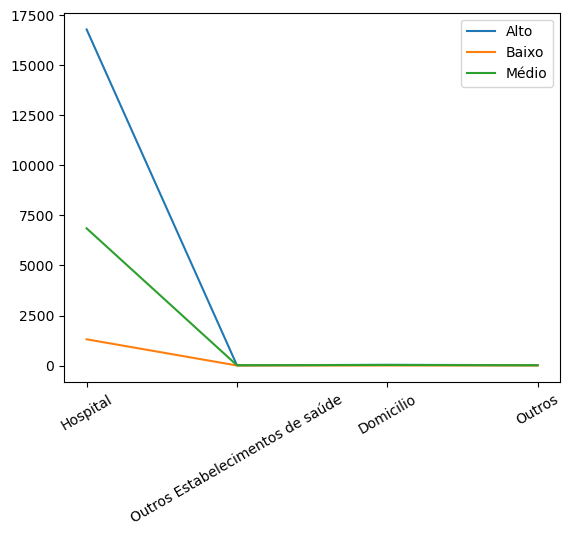

In [54]:
fig, ax = plt.subplots()
for idh in results.columns:
    ax.plot(results.index, results[idh], label = idh)
    ax.legend()
    
ax.set_xticks(results.index)
ax.set_xticklabels(['Hospital',  'Outros Estabelecimentos de saúde',  'Domicilio',  'Outros'], rotation=30)

plt.show()

In [55]:
sinasc_1['NumRegIDADEPAI'] = ~sinasc_1['IDADEPAI'].isna() # Criação de uma coluna que contabilize a confirmação do registro de IDADEPAI
results = sinasc_1.groupby(['NumRegIDADEPAI', 'faixa_idh'])['IDADEMAE'].count().unstack()
results

C:\Users\hfasa\AppData\Local\Temp\ipykernel_22956\1532073262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_1['NumRegIDADEPAI'] = ~sinasc_1['IDADEPAI'].isna() # Criação de uma coluna que contabilize a confirmação do registro de IDADEPAI


faixa_idh,Alto,Baixo,Médio
NumRegIDADEPAI,,,
False,12347,983,5175
True,4508,343,1735


In [56]:
results_percentual = round((results/results.sum())*100,2)
results_percentual

faixa_idh,Alto,Baixo,Médio
NumRegIDADEPAI,,,
False,73.25,74.13,74.89
True,26.75,25.87,25.11


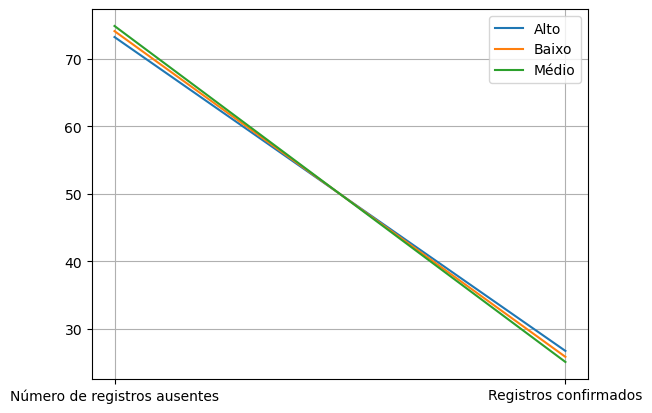

In [57]:
fig, ax = plt.subplots()
for idh in results_percentual.columns:
    ax.plot(results_percentual.index, results_percentual[idh],label = idh)
    ax.legend()
    ax.grid(True)
    
ax.set_xticks(results_percentual.index)   
ax.set_xticklabels(['Número de registros ausentes', 'Registros confirmados'])

plt.show()